In [1]:
import pandas as pd
import numpy as np
import ruptures as rpt
import plotly.express as px
import ipywidgets as widgets
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

%matplotlib inline

In [2]:
%store -r df

In [27]:
value = '18-24'
fdf = df[(df.ageRange.notnull()) & (df.ageRange == value)] if value else df
fdf

,id,gender,ageRange,occupation,compareDate,stepsEstimate,series,hour,steps
2544,5f8aa2bda634f3000798fab9,Male,18-24,None,2020-03-13,-0.20,before,10,209.450000
2545,5f8aa2bda634f3000798fab9,Male,18-24,None,2020-03-13,-0.20,before,11,516.500000
2546,5f8aa2bda634f3000798fab9,Male,18-24,None,2020-03-13,-0.20,before,12,762.050000
2547,5f8aa2bda634f3000798fab9,Male,18-24,None,2020-03-13,-0.20,before,13,353.750000
2548,5f8aa2bda634f3000798fab9,Male,18-24,None,2020-03-13,-0.20,before,14,220.450000
...,...,...,...,...,...,...,...,...,...
71899,60fae0def0928200089ac479,Female,18-24,None,2020-03-18,-0.25,after,05,0.000000
71900,60fae0def0928200089ac479,Female,18-24,None,2020-03-18,-0.25,after,06,0.000000
71901,60fae0def0928200089ac479,Female,18-24,None,2020-03-18,-0.25,after,07,1.304348
71902,60fae0def0928200089ac479,Female,18-24,None,2020-03-18,-0.25,after,08,42.100644


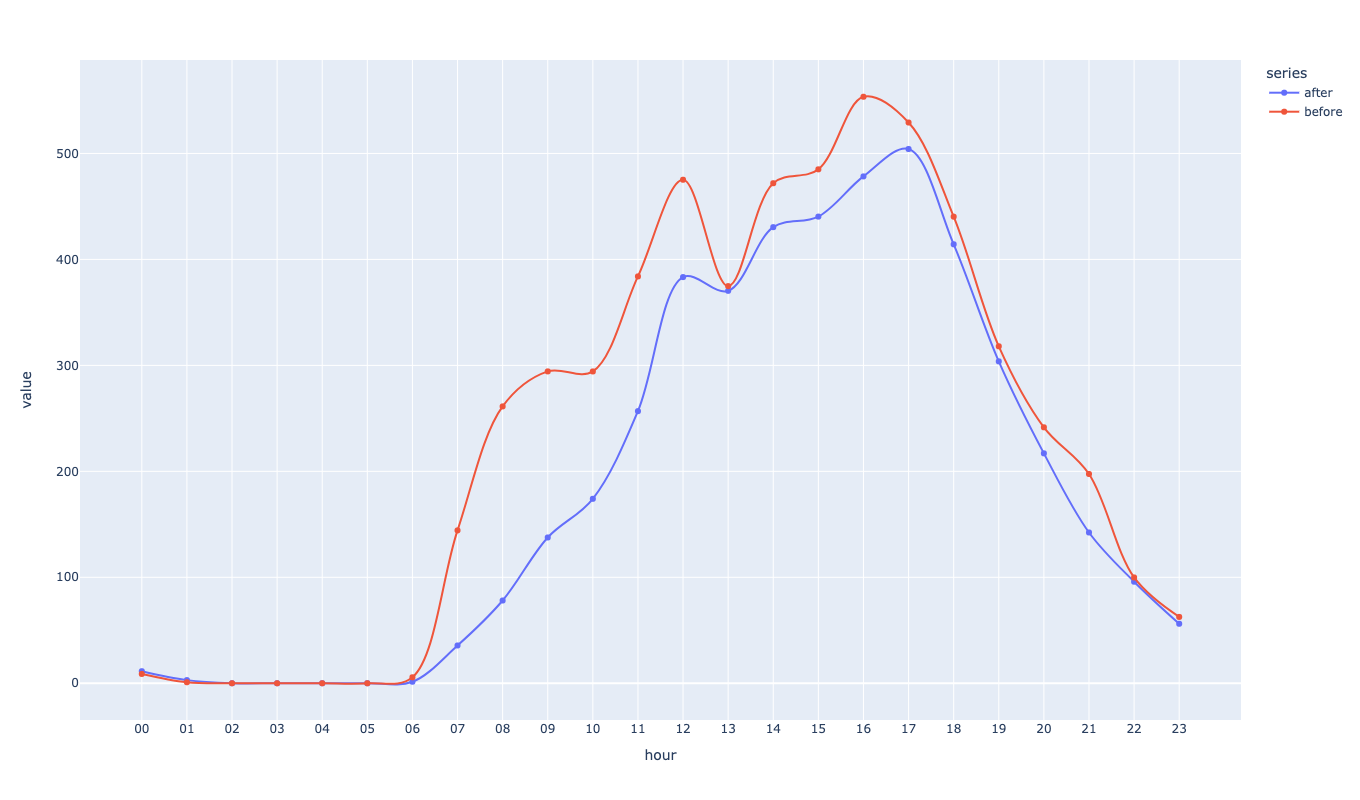

In [28]:
# fdf.pivot(index='hour', columns='series', values='steps')

(fdf.groupby(['hour','series'])
   .median().unstack('series')['steps'].plot.line(markers=True, line_shape='spline', height=800))
# grouped.pivot(index='hour', columns='series')

# grouped.plot(kind="line")
#fig = px.line(grouped, y="steps")
#fig.show()

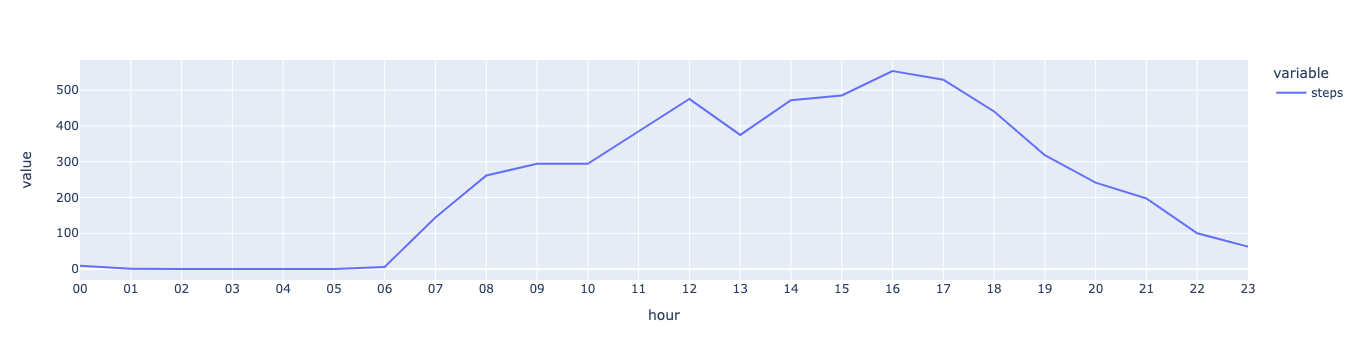

In [29]:
series_df = fdf[fdf['series'] == 'before']

(series_df.groupby(['hour'])
   .median()['steps'].plot.line())

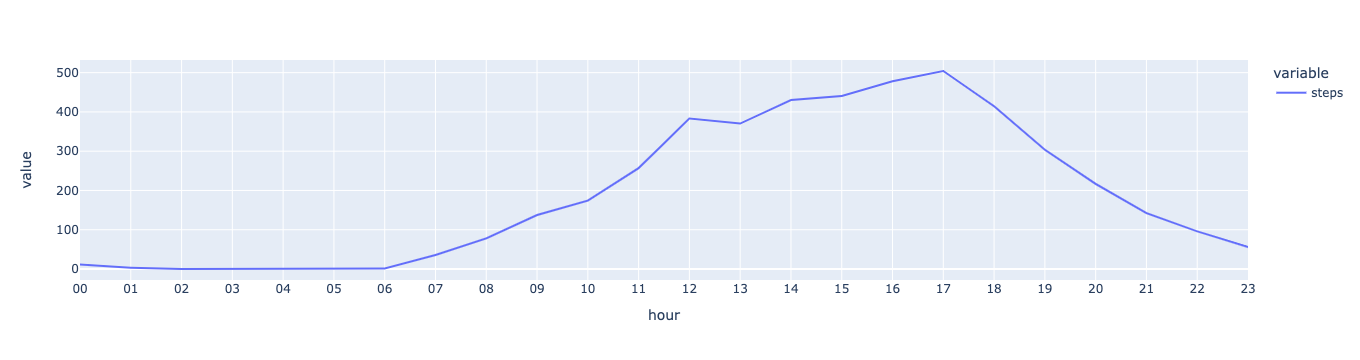

In [30]:
series_df = fdf[fdf['series'] == 'after']

(series_df.groupby(['hour'])
   .median()['steps'].plot.line())

In [35]:
steps_before = np.array(fdf[fdf['series'] == 'before'].groupby(['hour']).median()['steps'])
steps_after = np.array(fdf[fdf['series'] == 'after'].groupby(['hour']).median()['steps'])
# signal = np.stack((steps_before, steps_after), axis=1)
signal = steps_before

signal

array([  8.78571429,   0.95      ,   0.        ,   0.        ,
         0.        ,   0.        ,   5.62045455, 144.25746024,
       261.26737047, 294.3071188 , 294.26496155, 383.96118257,
       475.19047619, 374.80630593, 471.89563216, 485.0043896 ,
       553.51222214, 529.19444652, 440.34833494, 318.00272414,
       241.53254893, 197.50295989,  99.83857334,  62.60248515])

In [8]:
#n_samples, dim, sigma = 1000, 3, 4
#n_bkps = 4  # number of breakpoints
#signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
#bkps

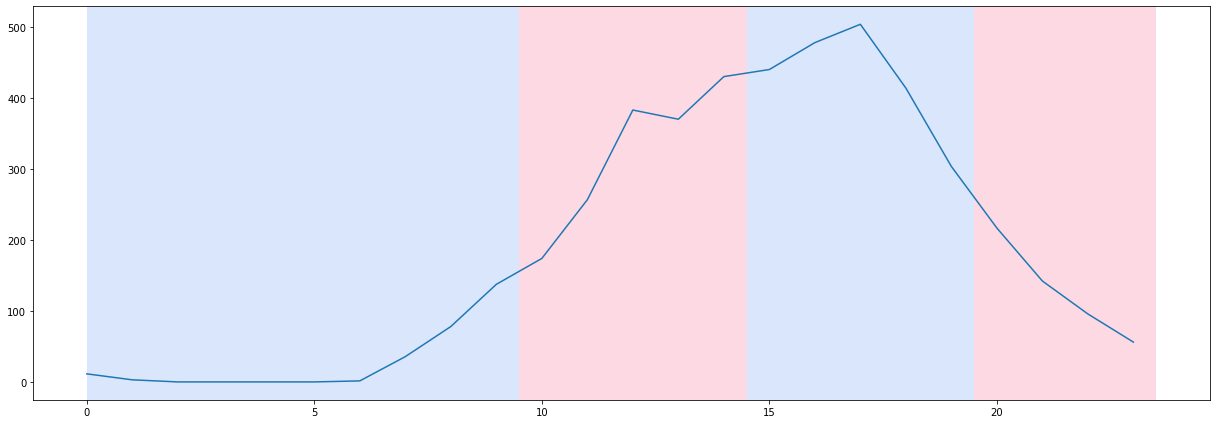

AttributeError: 'Int64Index' object has no attribute 'seconds'

In [34]:
# detection
#cost = rpt.costs.CostL2()
model = "l2"
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# display
rpt.display(signal, my_bkps, figsize=(17, 6))
plt.show()

df2 = fdf[fdf['series'] == 'before']
bkps_timestamps = df2.iloc[[0] + my_bkps[:-1] +[-1]].index
durations = (bkps_timestamps[1:] - bkps_timestamps[:-1])
d = durations.seconds/60/60
d_f = pd.DataFrame(d)


In [ ]:
new_signal = np.array([0,1,2,3,4,6,6,6,6,6,10,10,10,13,14,10,11,10,10,10,10,10,10,23])

cost = rpt.costs.CostL2()
model = "l2"
algo = rpt.Binseg(model=model).fit(new_signal)
my_bkps = algo.predict(n_bkps=3)

print(signal)
print(my_bkps)

# display
rpt.display(new_signal, my_bkps, figsize=(17, 6))
plt.show()